In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('Iris.csv')
Y = df['Species'].values
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = X.values

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y, test_size = .2)
numTrain = X_train.shape[0]
numTest = X_test.shape[0]

Y_oneHot = pd.get_dummies(Y_train).values
K = Y_oneHot.shape[1]

In [24]:
N, d = X_train.shape
allOnes = np.ones((N,1))
X_train = np.hstack((allOnes, X_train))

In [25]:
def softmax(u):
    expu = np.exp(u)
    return expu/np.sum(expu)

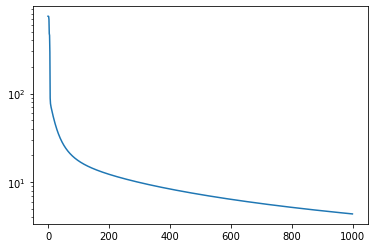

In [26]:
maxIter = 1000
alpha = .0005
beta = np.random.randn(K,d+1)
gradNorms =[]

for idx in range(maxIter):
    grad = np.zeros((K,d+1))
    for i in range(N):
        XiHat = X_train[i,:]
        Yi = Y_oneHot[i,:]
        u = beta @ XiHat #@ here means matrix multiplication in numpy
        Su = softmax(u)
        grad_i = np.zeros((K,d+1))
        for k in range(K):
            grad_i[k,:] = (Su[k] - Yi[k])*XiHat
        grad += grad_i
    beta = beta - alpha*grad
    nrm = np.linalg.norm(grad)
    gradNorms.append(nrm)
    
plt.semilogy(gradNorms)

In [27]:
N_test = X_test.shape[0]
allOnes_test = np.ones((N_test,1))
X_test = np.hstack((allOnes_test, X_test))
numSuccess = 0
for i in range(N_test):
    XiHat = X_test[i,:]
    Yi = Y_test[i]
    u = beta @ XiHat
    Su = softmax(u)
    k = np.argmax(Su)
    if k == 0:
        pred = 'Iris-setosa'
    if k == 1:
        pred = 'Iris-versicolor'
    if k == 2:
        pred = 'Iris-verginica'
    if pred == Yi:
        numSuccess +=1
print('accuracy: ' + str(numSuccess/N_test))

accuracy: 0.7
